### performing model comparison on behavioral data fit to model 1 & model 2

In [1]:
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import math
import os

from matplotlib import pyplot
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
os.getcwd()

'/Users/jackiebeltran/Documents/GitHub/RP_Learning/1_scripts/analysis'

In [30]:
### load parameter data  -- for either HC or MDD

m1_data = pd.read_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/model_1/N77_parameters.csv')

In [31]:
m2_data = pd.read_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/model_2/N77_parameters.csv')

#### preproc

In [32]:
m1_data.columns

Index(['Unnamed: 0', 'sub_ID', 'initial_alpha_conditions',
       'initial_beta_conditions', 'fit_alpha', 'fit_beta', 'log_likelihood',
       'BIC_model1', 'likelihood_per_trial', 'Iteration'],
      dtype='object')

In [33]:
m2_data.columns

Index(['Unnamed: 0', 'subject_ID', 'initial_reward_conditions',
       'initial_punishment_conditions', 'initial_beta_conditions',
       'fit_reward_alpha', 'fit_punishment_alpha', 'fit_beta',
       'log_likelihood', 'BIC_model2', 'likelihood_per_trial', 'Iteration'],
      dtype='object')

In [34]:
m1_data.rename(columns = {'sub_ID':'subject_ID'}, inplace = True)
m1_data.columns

Index(['Unnamed: 0', 'subject_ID', 'initial_alpha_conditions',
       'initial_beta_conditions', 'fit_alpha', 'fit_beta', 'log_likelihood',
       'BIC_model1', 'likelihood_per_trial', 'Iteration'],
      dtype='object')

In [35]:
# model 1 
col_name = ['BIC_model1']

m1=m1_data[col_name]

m1["model"] = "model_1" # add a column 

m1['subject'] = range(1, len(m1_data) + 1)

m1

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_53346/4153519725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1["model"] = "model_1" # add a column
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_53346/4153519725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1['subject'] = range(1, len(m1_data) + 1)


,BIC_model1,model,subject
0,84.390029,model_1,1
1,101.211665,model_1,2
2,133.766127,model_1,3
3,97.725203,model_1,4
4,120.851030,model_1,5
...,...,...,...
72,118.162669,model_1,73
73,131.709473,model_1,74
74,63.067645,model_1,75
75,129.657951,model_1,76


In [36]:
# model 2 

col_name = ['BIC_model2']

m2=m2_data[col_name]

m2["model"] = "model_2" # add a column 

m2['subject'] = range(1, len(m2_data) + 1)

m2

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_53346/1325148184.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2["model"] = "model_2" # add a column
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_53346/1325148184.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2['subject'] = range(1, len(m2_data) + 1)


,BIC_model2,model,subject
0,88.080751,model_2,1
1,104.640718,model_2,2
2,138.265926,model_2,3
3,99.776245,model_2,4
4,115.143905,model_2,5
...,...,...,...
72,111.658877,model_2,73
73,136.167304,model_2,74
74,67.567017,model_2,75
75,129.273616,model_2,76


In [37]:
# comparison of model bics 

bic_comparison = pd.concat([m1, m2], axis=1)
bic_comparison = bic_comparison[["subject", "BIC_model1", "BIC_model2"]]
bic_comparison

,subject,subject,BIC_model1,BIC_model2
0,1,1,84.390029,88.080751
1,2,2,101.211665,104.640718
2,3,3,133.766127,138.265926
3,4,4,97.725203,99.776245
4,5,5,120.851030,115.143905
...,...,...,...,...
72,73,73,118.162669,111.658877
73,74,74,131.709473,136.167304
74,75,75,63.067645,67.567017
75,76,76,129.657951,129.273616


In [38]:
bic_comparison.to_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/bic_comparison.csv')

In [39]:
m1_bics = pd.melt(m1, id_vars=['subject', 'model'],
              var_name='Model', value_name='BIC')
m1_bics

m2_bics = pd.melt(m2, id_vars=['subject', 'model'],
              var_name='Model', value_name='BIC')
m2_bics

,subject,model,Model,BIC
0,1,model_2,BIC_model2,88.080751
1,2,model_2,BIC_model2,104.640718
2,3,model_2,BIC_model2,138.265926
3,4,model_2,BIC_model2,99.776245
4,5,model_2,BIC_model2,115.143905
...,...,...,...,...
72,73,model_2,BIC_model2,111.658877
73,74,model_2,BIC_model2,136.167304
74,75,model_2,BIC_model2,67.567017
75,76,model_2,BIC_model2,129.273616


In [40]:
df =pd.concat([m1_bics, m2_bics], axis=0)

In [41]:
df

,subject,model,Model,BIC
0,1,model_1,BIC_model1,84.390029
1,2,model_1,BIC_model1,101.211665
2,3,model_1,BIC_model1,133.766127
3,4,model_1,BIC_model1,97.725203
4,5,model_1,BIC_model1,120.851030
...,...,...,...,...
72,73,model_2,BIC_model2,111.658877
73,74,model_2,BIC_model2,136.167304
74,75,model_2,BIC_model2,67.567017
75,76,model_2,BIC_model2,129.273616


### plots

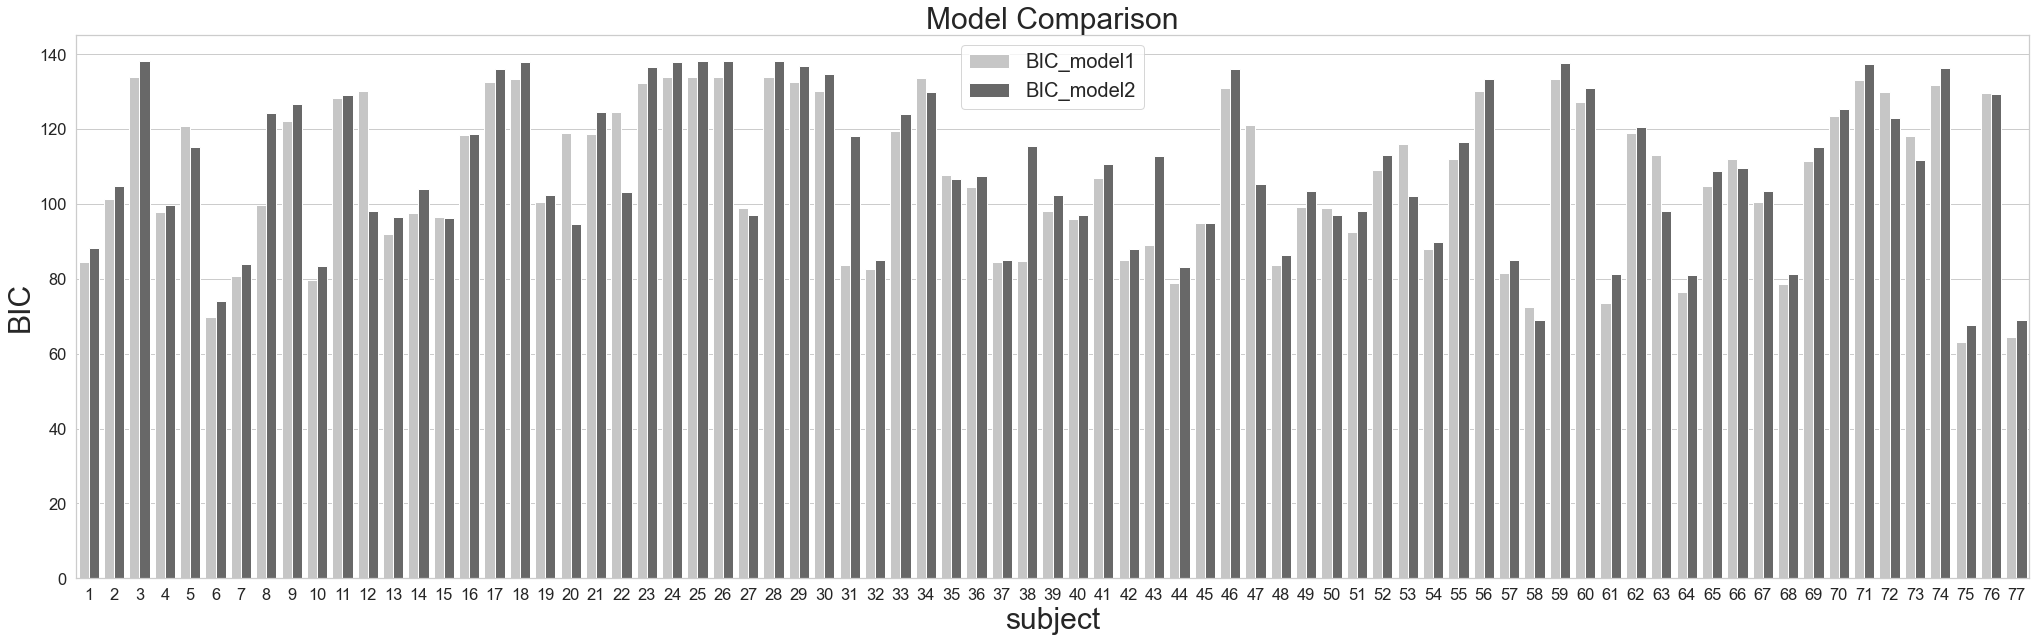

In [42]:
# dimensions

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

a4_dims = (35, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data=df, palette= "Greys", x="subject", y="BIC", hue = "Model")

# plt.xticks([49, 99, 149, 199, 249, 299])

# Set label for x-axis
ax.set_xlabel( "subject" , size = 30 )
  
# Set label for y-axis
ax.set_ylabel( "BIC" , size = 30 )
  
# Set title for plot
ax.set_title( "Model Comparison" , size = 30 )

plt.legend(loc='best', fontsize = 20)

In [47]:
# model 1
count = (bic_comparison['BIC_model1'] < bic_comparison['BIC_model2']).sum()    
print("model 1 BIC: ")
print(str(count) + " subjects have a lower BIC for model 1 than model 2")

# model 2, 0
count = (bic_comparison['BIC_model2'] < bic_comparison['BIC_model1']).sum() 
print("model 2 BIC: ")
print(str(count) + " subjects have a lower BIC for model 2 than model 1" )

model 1 BIC: 
60 subjects have a lower BIC for model 1 than model 2
model 2 BIC: 
17 subjects have a lower BIC for model 2 than model 1


## Paired sample t test

In [25]:
import scipy.stats as stats

In [44]:
m1_bic = bic_comparison[["BIC_model1"]]
m2_bic = bic_comparison[["BIC_model2"]]

t_statistic, p_value = stats.ttest_rel(m1_bic, m2_bic)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: [-1.96226272]
P-value: [0.05339283]
